Survey data captured for each school with block and district details comprises of :
* House-hold data with questions like whether student is attending school regularly, toilet in school, teachers in school etc.
* School-wise contest conducted by gram panchayat. this data is captured for each question


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class_4 = pd.read_csv('./data/HH_survey_gp_contest_class-4_combined_2016-17.csv')
class_5 = pd.read_csv('./data/HH_survey_gp_contest_class-5_combined_2016-17.csv')
class_6 = pd.read_csv('./data/HH_survey_gp_contest_class-6_combined_2016-17.csv')

class_4['class'] = 4
class_5['class'] = 5
class_6['class'] = 6

class_4.shape, class_5.shape, class_6.shape

((429, 64), (437, 66), (322, 66))

In [2]:
data_full = pd.concat([class_4, class_5, class_6], sort=True)
print(data_full.shape)
print(data_full.columns)
# Dim - 1188 x 66
data_full.head()

(1188, 66)
Index(['Block', 'Date', 'District', 'Grama Panchayat', 'KLP ID',
       'Name of the school', 'Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q2', 'Q20', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Total', 'Village', 'block', 'child_count', 'class',
       'dise_code', 'district', 'dont know', 'dont know.1', 'dont know.2',
       'dont know.3', 'dont know.4', 'dont know.5', 'dont know.6',
       'dont know.7', 'dont know.8', 'dont know.9', 'klpid', 'no ', 'no .1',
       'no .2', 'no .3', 'no .4', 'no .5', 'no .6', 'no .7', 'no .8', 'no .9',
       'school_name', 'village', 'yes', 'yes.1', 'yes.2', 'yes.3', 'yes.4',
       'yes.5', 'yes.6', 'yes.7', 'yes.8', 'yes.9'],
      dtype='object')


,Block,Date,District,Grama Panchayat,KLP ID,Name of the school,Q1,Q10,Q11,Q12,...,yes,yes.1,yes.2,yes.3,yes.4,yes.5,yes.6,yes.7,yes.8,yes.9
0,Hosakote,1/10/2016,Bangalore Rural,Hettakki,NaN,NaN,0.5,1.00,1.00,0.50,...,6,6,6,0,6,6,4,5,6,6
1,Hosakote,4/10/2016,Bangalore Rural,Muthasandra,NaN,NaN,0.5,0.00,0.00,0.75,...,77,79,79,24,75,66,13,26,25,39
2,Hosakote,24/12/2016,Bangalore Rural,Anugondanahalli,NaN,NaN,1.0,0.33,0.17,0.67,...,42,42,35,7,42,37,26,30,23,22
3,Hosakote,24/12/2016,Bangalore Rural,Ittasandra,NaN,NaN,0.6,0.20,0.00,0.00,...,45,64,65,66,52,57,32,46,44,41
4,Hosakote,24/12/2016,Bangalore Rural,Giddappanahalli,NaN,NaN,1.0,0.00,0.00,0.25,...,10,10,10,0,10,10,4,10,7,4


#### Select few columns from concat dataframe

In [3]:
# contest_df is a DataFrame without index
cols_to_keep = ['class', 'District', 'Block', 'school_name', 'child_count', 'Total']
contest_df = data_full.filter(cols_to_keep, axis=1)

#contest_df dim 1188*6
contest_df.head()

,class,District,Block,school_name,child_count,Total
0,4,Bangalore Rural,Hosakote,GLPS Agasarahalli,6,12.50
1,4,Bangalore Rural,Hosakote,GLPS Ajjagondanahalli,79,6.75
2,4,Bangalore Rural,Hosakote,G HPS ANUGONDANAHALLI,42,13.50
3,4,Bangalore Rural,Hosakote,GHPS Anupahalli,66,7.00
4,4,Bangalore Rural,Hosakote,GHPS Arasanahalli,10,8.75


#### School contest data grouped by Block
Here, count is the number of schools(rows in dataframe) for that block.

Mean, min, max etc. are of contest score of the schools in that block

In [4]:
blk_score = contest_df.groupby('Block')['Total']
blk_score.describe()

,count,mean,std,min,25%,50%,75%,max
Block,,,,,,,,
Aland,28.0,7.706071,3.583061,0.00,5.3075,7.330,9.4800,14.53
Aurad,35.0,10.494857,3.316277,4.00,8.2700,10.890,12.6100,18.17
Bellary West,3.0,7.653333,2.650289,5.35,6.2050,7.060,8.8050,10.55
Bidar,12.0,9.737500,3.402638,4.17,7.9475,9.330,12.4650,14.65
Devadurga,33.0,9.736970,3.664816,2.82,7.0000,9.250,13.3300,15.50
Gangavathi,29.0,9.336552,3.950278,3.00,6.6700,9.280,12.5000,19.20
Hagaribommanahalli,4.0,13.545000,2.086376,11.00,12.8750,13.535,14.2050,16.11
Hirejanthakal,2.0,11.430000,0.806102,10.86,11.1450,11.430,11.7150,12.00
Hosakote,188.0,9.117021,3.024070,1.00,6.9800,9.000,11.1975,17.00


#### Setting school name as index

In [5]:
contest_df.reset_index(drop=True, inplace=True)
print(contest_df.index.name)

contest_df.set_index('school_name', inplace=True)
contest_df.to_csv("contest_data.csv")

contest_df.head(10)

None


,class,District,Block,child_count,Total
school_name,,,,,
GLPS Agasarahalli,4,Bangalore Rural,Hosakote,6,12.50
GLPS Ajjagondanahalli,4,Bangalore Rural,Hosakote,79,6.75
G HPS ANUGONDANAHALLI,4,Bangalore Rural,Hosakote,42,13.50
GHPS Anupahalli,4,Bangalore Rural,Hosakote,66,7.00
GHPS Arasanahalli,4,Bangalore Rural,Hosakote,10,8.75
GHPS Attibele,4,Bangalore Rural,Hosakote,40,7.00
GKLPS Balenahalli,4,Bangalore Rural,Hosakote,14,13.00
GKLPS Banahalli,4,Bangalore Rural,Hosakote,19,13.00
GLPS Bellikere,4,Bangalore Rural,Hosakote,30,4.67


#### Block-wise aggregate data :
School scores(sum of Total), school which has min score, and max for each block

In [6]:
agg_score_sum = contest_df.groupby(['Block'])['Total'].agg('sum')
min_score_school = contest_df.groupby(['Block'])['Total'].agg('idxmin')
max_score_school = contest_df.groupby(['Block'])['Total'].agg('idxmax')

block_df = agg_score_sum.to_frame()
block_df.rename(columns={'Total':'total_score'}, inplace=True)

block_df['min_score_school'] = min_score_school.tolist()
block_df['max_score_school'] = max_score_school.tolist()

# block_df - 20x3, indexed on 'Block'
block_df.head()

,total_score,min_score_school,max_score_school
Block,,,
Aland,215.77,GLPS Jidaga New,GHPS Jamaga j
Aurad,367.32,GHPS Halhalli,GHPS Belkunchi (CH)
Bellary West,22.96,GHPS Orvai (W),GHPS Orvai (W)
Bidar,116.85,GHPS Baroor,GHPS Sindankera
Devadurga,321.32,GMHPS Koppar,GLPS Pandyan


#### Histogram of freq of school wrt contest score

school_name
(1184, 5)


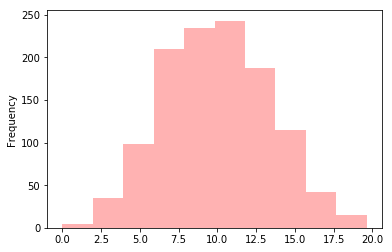

In [7]:
# Done directly on 'contest_df' dataframe
print(contest_df.index.name)

# Remove schools with less than 5 students, only 4 such schools
contest_df = contest_df.loc[contest_df['child_count'] > 4]
print(contest_df.shape)

contest_df["Total"].plot.hist(color = "red", bins = 10, alpha = 0.3)

#### School contest data grouped by Block
Here, count is the number of schools(rows in dataframe) for that block.

Mean, min, max etc. are of child_count of the schools in that block

In [8]:
blk_child_count = contest_df.groupby(['Block'])['child_count'].describe()
blk_child_count.head()

,count,mean,std,min,25%,50%,75%,max
Block,,,,,,,,
Aland,28.0,80.500000,24.246420,40.0,68.75,80.0,89.00,137.0
Aurad,35.0,84.885714,38.295117,35.0,45.00,100.0,120.00,150.0
Bellary West,3.0,160.000000,0.000000,160.0,160.00,160.0,160.00,160.0
Bidar,12.0,92.250000,35.035372,70.0,70.00,74.5,96.75,150.0
Devadurga,33.0,108.606061,23.603415,60.0,100.00,100.0,120.00,140.0


#### Pairwise correlation of columns of blk_child_count Dataframe

In [9]:
# Correlation between child_count mean and school count is -ve, so no correlation
blk_child_count.corr()

,count,mean,std,min,25%,50%,75%,max
count,1.000000,-0.137822,0.402170,-0.416400,-0.260109,-0.134169,-0.065356,0.467893
mean,-0.137822,1.000000,0.166020,0.826728,0.900138,0.966194,0.947122,0.702164
std,0.402170,0.166020,1.000000,-0.378737,-0.251042,0.236732,0.419409,0.676459
min,-0.416400,0.826728,-0.378737,1.000000,0.948283,0.754109,0.640641,0.263412
25%,-0.260109,0.900138,-0.251042,0.948283,1.000000,0.810005,0.721548,0.442160
50%,-0.134169,0.966194,0.236732,0.754109,0.810005,1.000000,0.961261,0.680382
75%,-0.065356,0.947122,0.419409,0.640641,0.721548,0.961261,1.000000,0.767046
max,0.467893,0.702164,0.676459,0.263412,0.442160,0.680382,0.767046,1.000000


#### Bar chart of child-count (mean) for each block

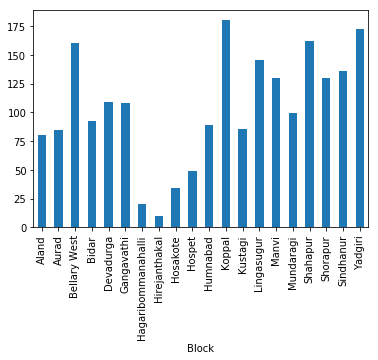

In [11]:
blk_child_count['mean'].plot.bar(x='Block', y='child_count')